This code is designed to import and display the GLM data

In [1]:
#import resources

import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import os
import cartopy.feature as cfeature
import cartopy.mpl as cmpl
import pyproj as proj
import matplotlib.pyplot as plt

In [2]:
#import netCDF file
nc_file = nc.Dataset('/localdata/cases/20190403/GLM_grids/2019/Apr/04/GLM-00-00_20190404_001700_60_1src_056urad-dx_total_energy.nc','r')
nc_file

nw_lat=36.40
nw_lon=-102.24
se_lat=34.10
se_lon=-96.80

In [3]:
tests = nc_file.variables['goes_imager_projection']
nc_file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): nx(2499), ny(1499), ntimes(1)
    variables(dimensions): int32 goes_imager_projection(), float32 x(nx), float32 y(ny), float32 time(ntimes), float32 total_energy(ntimes,nx,ny)
    groups: 

In [4]:
time = nc_file.variables['time']
dtime = nc.num2date(time[:],time.units)
print (dtime)

[datetime.datetime(2019, 4, 4, 0, 17)]


In [6]:
#makes the variable from the netCDF file into a local variable that we can use when plotting data
GLM_var = nc_file.variables['total_energy'][:,:]
GLM_var = np.squeeze(GLM_var)

x = nc_file.variables['x'][:] 
y = nc_file.variables['y'][:]

#GLM_var[x==x[1850],:] = 1000
#GLM_var[x==x[1600],:] = 1000

#GLM_var[:,y==y[810]] = 1000
#GLM_var[:,y==y[740]] = 1000
GLM_var[GLM_var==0] = np.nan
print (x)

[-0.101304 -0.101248 -0.101192 ...  0.038472  0.038528  0.038584]


In [18]:
x_locs = np.arange(1600,1851,1)
y_locs = np.arange(740,811,1)

GLM_iso_var = np.ones((len(x),len(y)))*np.nan

for i in x_locs:
    for j in y_locs:
        GLM_iso_var[i,j] = GLM_var[i,j]

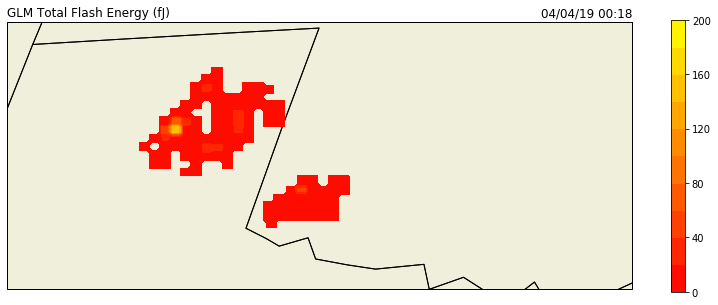

In [21]:
bounds = np.arange(0, 220, 20)
#creating plot with all the features
plt.figure(figsize=(14, 5))
ax = plt.axes(projection=ccrs.Geostationary(-75, 35786023.0))
#ax.set_extent([-87, -80, 25, 32]) #FLORIDA
ax.set_extent([nw_lon, se_lon, se_lat, nw_lat])
#ax.set_extent([-138, -60, 24, 55]) #CONUS
#ax.set_extent([-97, -90, 39, 42]) #MIZZOURI
plt.contourf(x * 35786023.0, y * 35786023.0, GLM_var.T*10**15, levels=bounds, cmap=plt.get_cmap('autumn'), zorder=10)
plt.title('GLM Total Flash Energy (fJ)', loc='left')
plt.title('04/04/19 00:18', loc='right')
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.STATES, zorder=8)
ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

we = plt.colorbar()
plt.savefig("Energy-20190404-0018.png", orientation="landscape", format="png")


In [10]:
maptest=ccrs.Geostationary(-75, 35786023.0)
data_crs = ccrs.PlateCarree(0)

In [14]:
maptest.transform_points(data_crs,old_lon,old_lat)

array([[5399041.03267252,    6318.24894243,       0.        ],
       [5399041.02653432,    6323.65827513,       0.        ],
       [5399041.02039005,    6329.06832754,       0.        ],
       ...,
       [5401000.39575129,   13327.7792882 ,       0.        ],
       [5401000.38280153,   13333.18595201,       0.        ],
       [5401000.36984651,   13338.59261581,       0.        ]])

In [56]:
geos(-90,0)

(-1639670.198596629, 0.0)

In [101]:
wgs84 = proj.Proj("+proj=longlat +ellps+WGS84 +datum=WGS84 +no_defs +units=m")
print (wgs84)
geos = proj.Proj("+proj=geos +lon_0=-75 +lat_0=0 +h=35786023.0 +x_0=0 +y_0=0 +units=km +ellps=WGS84 +sweep=x +no_defs")
print (geos)

In [13]:
#Creating 1-D arrays that can go into the proj.transform function

lat_grid = np.ones_like(GLM_var)*np.nan
lon_grid = np.ones_like(GLM_var)*np.nan
print (lat_grid.shape)
print (len(x))
print (len(y))
for i in np.arange(0,len(x),1): #Filling the latitude grid
    lat_grid[i,:] = y
for i in np.arange(0,len(y),1): #Filling the latitude grid
    lon_grid[:,i] = x
    
old_lat = np.reshape(lat_grid,len(x)*len(y))
old_lon = np.reshape(lon_grid,len(x)*len(y))

(3249, 1300)
3249
1300


In [81]:
lon,lat = proj.transform(geos,wgs84,x1*100000,y1*100000)

In [104]:
x1,y1 = np.meshgrid(x,y)

In [68]:
x1.shape

(1300, 3249)

In [82]:
print (lon)

[[-75.1243568  -75.1243065  -75.12425619 ... -74.96106438 -74.96101407
  -74.96096377]
 [-75.1243568  -75.1243065  -75.12425619 ... -74.96106438 -74.96101407
  -74.96096377]
 [-75.1243568  -75.1243065  -75.12425619 ... -74.96106438 -74.96101407
  -74.96096377]
 ...
 [-75.12435707 -75.12430677 -75.12425646 ... -74.96106429 -74.96101399
  -74.96096368]
 [-75.12435707 -75.12430677 -75.12425646 ... -74.96106429 -74.96101399
  -74.96096368]
 [-75.12435707 -75.12430677 -75.12425646 ... -74.96106429 -74.96101399
  -74.96096368]]


In [47]:
lat,lon = geos.to_latlong(x1,y1)

TypeError: to_latlong() takes 1 positional argument but 3 were given

In [80]:
print (x*100000.0)

[-13843.31   -13837.71   -13832.11   ...   4334.2905   4339.8906
   4345.49  ]


In [105]:
geos(x1,y1,inverse=True)
#geos(-100,40)

(masked_array(
   data=[[-75.00000124, -75.00000124, -75.00000124, ..., -74.99999961,
          -74.99999961, -74.99999961],
         [-75.00000124, -75.00000124, -75.00000124, ..., -74.99999961,
          -74.99999961, -74.99999961],
         [-75.00000124, -75.00000124, -75.00000124, ..., -74.99999961,
          -74.99999961, -74.99999961],
         ...,
         [-75.00000124, -75.00000124, -75.00000124, ..., -74.99999961,
          -74.99999961, -74.99999961],
         [-75.00000124, -75.00000124, -75.00000124, ..., -74.99999961,
          -74.99999961, -74.99999961],
         [-75.00000124, -75.00000124, -75.00000124, ..., -74.99999961,
          -74.99999961, -74.99999961]],
   mask=False,
   fill_value=1e+20), masked_array(
   data=[[5.91528427e-07, 5.91528427e-07, 5.91528427e-07, ...,
          5.91528427e-07, 5.91528427e-07, 5.91528427e-07],
         [5.92034861e-07, 5.92034861e-07, 5.92034861e-07, ...,
          5.92034861e-07, 5.92034861e-07, 5.92034861e-07],
         [5.925

1555078.2

In [100]:
tests

<class 'netCDF4._netCDF4.Variable'>
int32 goes_imager_projection()
    long_name: GOES-R ABI fixed grid projection
    grid_mapping_name: geostationary
    perspective_point_height: 35786023.0
    semi_major_axis: 6378137.0
    semi_minor_axis: 6356752.31414
    inverse_flattening: 298.2572221
    latitude_of_projection_origin: 0.0
    longitude_of_projection_origin: -75.0
    sweep_angle_axis: x
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used